# Deep Learning for Life Sciences - Team Assignment

Recent progress in spatial tissue imaging has resulted in the emergence of many new technologies that enable measurements of multiple biological markers at the subcellular level. One such technology is IMC (Imaging Mass Cytometry), developed at [BodemillerLab](https://www.bodenmillerlab.com/#/) in Zurich. [Here](https://www.nature.com/articles/s41586-019-1876-x), you can read how this technology has enabled massive progress in understanding the mechanisms behind breast cancer.

One application of this technology is analyzing the data from the [Immucan](https://immucan.eu/) consortium, where data from patients with different cancer types is analyzed using various techniques, including IMC.

# Task
[Cell typing](https://en.wikipedia.org/wiki/Cell_type), a fundamental step in cellular data analysis, involves assigning each cell to a specific type. In this assignment, you will perform cell typing based on the manually expert-annotated data. At the high level, your task will be to:

1. **Perform EDA (exploratory data analysis) (3pts)** - in the form of an approx. 5-minute presentation - you will present your insight about the data you were provided with.
2. **Apply a baseline technique for the classification (3pts).** Each team should try at least three popular techniques on the provided data. Among these three popular techniques, there should be:
    - one linear baseline (e.g., multiclass logistic regression, SVM, etc.),
    - one gradient boosting technique (e.g., XGBoost, CatBoost, etc.),
    - one additional technique of your choice.
3. **Apply one of the state-of-the-art methods pre-selected by Immucan researchers (5pts)** (see description below).

## State-of-the-art methods
We will assign each team with one of the pre-selected state-of-the-art methods:
- [cellSighter](https://www.nature.com/articles/s41467-023-40066-7),
- [Stellar](https://www.nature.com/articles/s41592-022-01651-8), (additional [biorxiv](https://www.biorxiv.org/content/10.1101/2021.11.24.469947v3) URL),
- [Pixie](https://www.nature.com/articles/s41467-023-40068-5),
- [Astir](https://astir.readthedocs.io/en/latest/index.html),
- [Celesta](https://www.nature.com/articles/s41592-022-01498-z) (additional [biorxiv](https://www.biorxiv.org/content/10.1101/2022.02.02.478888v1) URL),
- [CSPOT](https://www.biorxiv.org/content/10.1101/2023.11.15.567196v1),
- [STARLING](https://www.biorxiv.org/content/10.1101/2024.02.29.582827v2).

We will assign a method to a team based on the random choice driven by your preferences. The voting procedure will be as follows: each team must set their preferences in this [sheet](https://docs.google.com/spreadsheets/d/1wtdwD7O49GHmPmPPFYF9WcjlDG0VRwf6MOWh3aV0iaw/edit?usp=sharing) (where you should also write your team name and members). To each method, your team can assign from 0 to 5 points (the more points, the higher the chance of getting a method). Each team has 10 points in total. In case when there are more teams than selected methods, the most popular method will be assigned to more than one team. Please e-mail marcin.mozejko@student.uw.edu.pl once you filled the spreadsheet for your team.

# Data
We will provide you with [training data](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing) and a hold-out test set. The training data will be provided from the start of the assignment, and the test data will be provided on May 9th during the grading of your task. Both datasets are in the same format. In the code below the task description you will be provided with a brief data overview.

# Grading
1. **EDA** - A maximal number of points (3) will be assigned when a team will present:
    - A general data overview,
    - Correlation patterns between markers and cell types (at least 3) - with a biological explanation,
    - Three biologically driven patterns of intertype marker differentiation (e.g., Tumor PDL1+ vs Tumor PDL1-, Mac CD206+ vs Mac CD206-, etc.),
2. **Baseline techniques**: For proper implementation of each of the three methods, we will award 1 point,
If possible, a method should enable random seed/state-based reproducibility,
3. **State-of-the-art methods**: A proper application of the existing method will be awarded with 5 pts.

## Metrics

Please report:
- overall Accuracy, and `macro-f1`,
- per cell type `average_precision` and `AUC`.

## Additional Compute

In case you need an additional compute - please contant the author of the task: marcin.mozejko@student.uw.edu.pl

## Deliverables
Each team should provide a git repository with a code and analysis. In each of the repositories, there should be:
1. Instructions on how to set up the environment (e.g., virtual env, docker, etc.) to run your method (1pt),
2. Instructions on how to pre-train baselines and state-of-the-art methods on new data (in the same format as the one provided with the task). For each method, the output should be a table where each cell will be assigned cell-type probabilities (if available) and a final cell-type prediction (2 pts).
3. Instructions on how to apply your pre-trained baseline methods and assigned state-of-the-art methods to new data (in the same format as the one provided with the task). For each method, the output should be a table where each cell will be assigned cell-type probabilities (if available) and a final cell-type prediction (1pts).

## Additional points:
- A team with the highest scoring baseline method on the test data will be awarded three activity points,
- Any creative modification of the state-of-the-art method will be awarded with up to 3 activity points,
- Any interesting biological insight gained from EDA or baseline/method training will be awarded with up to 3 activity points,
- Any uncertainty-based analysis of any model result will be awarded with one activity point.

## Project Timeline
- **April 11th** - release of the task, and the state-of-the-art method voting spreadsheet,
- **April 15th, 23:59** - end of the state-of-the-art method voting,
- **April 18th** - assignment of the state-of-the-art methods to the teams,
- **May 9th** - final presentation, release of the test data.

# Contact

In case of any questions - contact **Marcin Możejko** (marcin.mozejko@student.uw.edu.pl) - the author of the task.

# Data Overview

Let us start with appropriate imports:

In [ ]:
!pip install anndata
!pip install delayedarray
!pip install pyometiff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 718.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 16.8 MB/s eta 0:00:00


Now - download the training data from [here](https://drive.google.com/file/d/1-0YOHE1VoTRWqfBJLHQorGcHmkhCYvqW/view?usp=sharing).

Unzip the archive and set `PATH_TO_FOLDER` to a path where you unzipped the data:

In [ ]:
import os

from google.colab import drive

import anndata


# drive.mount('/content/drive') # use if you plan to use colab.
PATH_TO_FOLDER = None
TRAIN_DATA_PATH = 'train'
ORIGINAL_IMAGE_DATA_SUBDIR = 'images_masks'
ORIGINAL_MASKS_SUBDIR = 'masks'
ORIGINAL_IMAGES_SUBDIR = 'img'

if PATH_TO_FOLDER is None:
    raise ValueError('Please set PATH_TO_FOLDER to a path with unzipped training data.')

ANNDATA_PATH = 'cell_data.h5ad'
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

Mounted at /content/drive


## Data overview

A provided training data consist of two entities:
- a tabular data (stored in a `cell_data.h5ad` file),
- image data - stored in `images_masks` directory.

Let us start with having a look at the tabular data:

In [ ]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)
train_anndata.obs.head()

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,600.0,...,0,0,0,0,0,1,8.773580,,Batch20191023,MacCD163
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,600.0,...,0,0,0,0,0,0,72.247393,,Batch20191023,Mural
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_5,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,16.982199,,Batch20191023,DC
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_7,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,600.0,...,0,0,0,0,0,1,-8.314676,,Batch20191023,Tumor
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_8,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,600.0,...,0,0,0,0,0,1,-15.358007,,Batch20191023,Tumor


Train `anndata` `obs` dataframe stores the information about cells. Each row in this table represent an information about a single cell. It has the following columns that are interesting for your analysis:
- `image` - name of the image file from which a cell was obtained,
- `sample_id` - name of the patient sample from which a given image was obtained,
- `ObjectNumber` - a cell number within a given image (note that it starts from 1),
- `Pos_X`, `Pos_Y` - a spatial position of the cell one the image,
- `area`, `major_axis_length`, `minor_axis_length`, `eccentricity`, `width_px`, `height_px` - shape-derived features of a cell,
- `Batch` - a batch in which a sample was used,
- `cell_labels` - your target cell type annotations. **THIS IS WHAT YOUR MODELS AIM TO PREDICT!**

`train_anndata.var` stores the information about the marker names. Please use the `marker` column in your analysis:

In [ ]:
train_anndata.var.head()

,channel,use_channel,marker
0,Y89,1,MPO
1,In113,0,HistoneH3
2,In115,1,SMA
3,Pr141,1,CD16
4,Nd142,1,CD38


`train_anndata.layers['exprs']` with shape `(train_anndata.obs.shape[0], train_anndata.var.shape[0])` stores the matrix with marker expressions for each cell:

In [ ]:
train_anndata.layers['exprs']

array([[0.        , 1.81998789, 0.50264976, ..., 0.42427316, 4.76113044,
        5.30135121],
       [0.13592021, 2.39308671, 1.1369607 , ..., 0.1186204 , 5.02924127,
        5.53076447],
       [0.16590455, 2.24491655, 1.39633367, ..., 0.01514088, 4.41838981,
        4.81592274],
       ...,
       [0.11088375, 3.52028872, 0.31083376, ..., 0.10251545, 4.30306951,
        4.82609754],
       [0.15094134, 4.2149584 , 2.65164581, ..., 0.08397474, 4.8224562 ,
        5.36166154],
       [0.49059059, 5.8223478 , 1.61541043, ..., 0.22942113, 4.44821169,
        5.01081325]])

# Image Data

We will now show you how to connect information from the tabular data with the image information. Let us have a look at the third cell in the table:

In [ ]:
train_anndata.obs.iloc[2]

image                   IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...
sample_id               IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...
ObjectNumber                                                          5.0
Pos_X                                                          309.083333
Pos_Y                                                                0.75
area                                                                 12.0
major_axis_length                                                5.294329
minor_axis_length                                                 2.86222
eccentricity                                                     0.841267
width_px                                                            600.0
height_px                                                           600.0
acquisition_id                                                        2.0
SlideId                                   10032145-THOR-VAR-TIS-01-IMC-01
Study                                 

We can see that the image name assigned to this cell is `IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff`. Additionally - please note that the `ObjectNumber` is equal to 5. Now there are two type of image data:

- marker data (stored in `images_masks/img` subdir),
- mask data (stored in `images_masks/masks` subdir).

Let us have a look at the image and mask from which a given cell was taken:

In [ ]:
import pyometiff
import matplotlib.pyplot as plt


image_name = train_anndata.obs.iloc[2]['image']
image_path = os.path.join(TRAIN_IMAGE_DATA_IMAGES, image_name)
mask_path = os.path.join(TRAIN_IMAGE_DATA_MASKS, image_name)

In [ ]:
image_reader = pyometiff.OMETIFFReader(fpath=image_path)
mask_reader = pyometiff.OMETIFFReader(fpath=mask_path)


image_array, _, _ = image_reader.read()
mask_array, _, _ = mask_reader.read()

In `mask_array` each pixel stores the information about which `ObjectNumber` cell a particular pixel belongs to:

In [ ]:
plt.imshow(mask_array)

So the third cell in the table is located for pixel where `mask_array == 5` (because 5 is an `ObjectId` for this particular cell).

`image_array` stores information about the marker expression. The channels are in the same ordering as in `train_anndata.var`. Now - let us have a look at the `SMA` expression for our image:

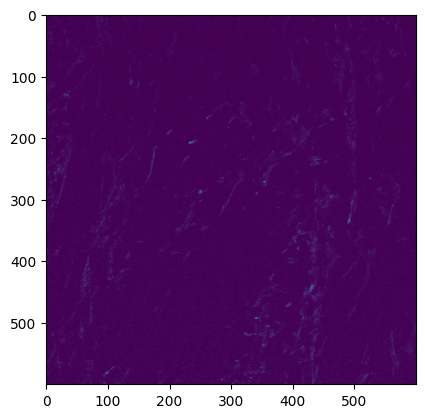

In [ ]:
plt.imshow(image_array[2])

Seems bleaky? Let's have a look at the `SMA` marker distribution on this image:

(array([6.41465950e-02, 3.20609319e-04, 3.47670251e-05, 8.60215054e-06,
        3.76344086e-06, 1.07526882e-06, 3.58422939e-07, 1.79211470e-07,
        0.00000000e+00, 1.79211470e-07]),
 array([  0. ,  15.5,  31. ,  46.5,  62. ,  77.5,  93. , 108.5, 124. ,
        139.5, 155. ]),
 <BarContainer object of 10 artists>)

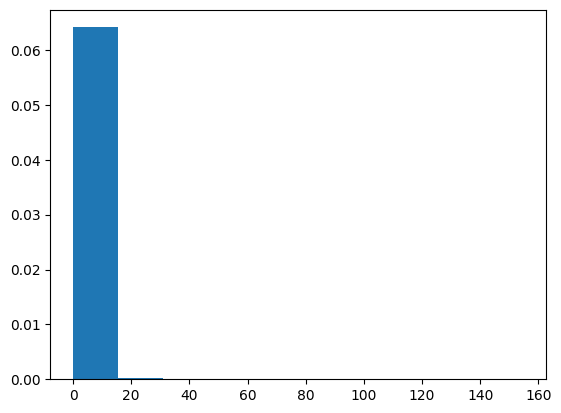

In [ ]:
plt.hist(image_array[2].flatten(), density=True)

Well, we can see that it is heavy-tailed. A standard way of dealing with this problem is to apply an `arcsinh(x/5.)` transform:

(array([1.99634287e+00, 2.41139488e-01, 1.11531219e-01, 4.94796961e-02,
        1.71415650e-02, 5.22255770e-03, 1.41332103e-03, 4.17266208e-04,
        1.27871902e-04, 2.01903004e-05]),
 array([0.        , 0.41273944, 0.82547889, 1.23821833, 1.65095777,
        2.06369721, 2.47643666, 2.8891761 , 3.30191554, 3.71465499,
        4.12739443]),
 <BarContainer object of 10 artists>)

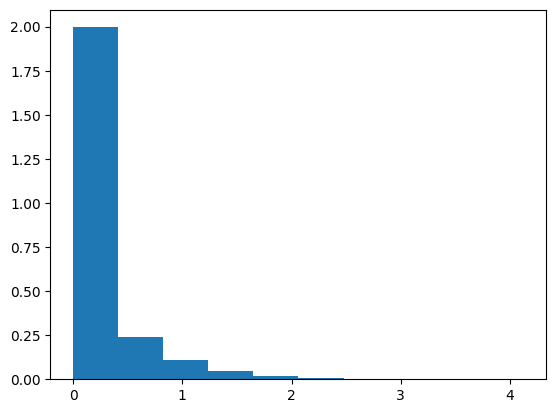

In [ ]:
import numpy


plt.hist(numpy.arcsinh(image_array[2].flatten() / 5.0), density=True)

Well - much better. And this is how it looks on the image:

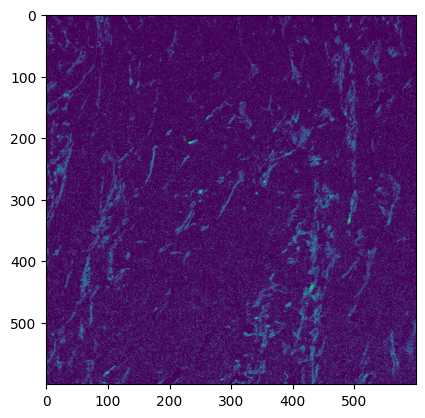

In [ ]:
plt.imshow(numpy.arcsinh(image_array[2] / 5.))

**NOTE:** Please use an `arcsinh(x / 5.)` transform on your data.

For more on the `imc` data preprocessing - look [here](https://bodenmillergroup.github.io/ImcSegmentationPipeline/prepro.html#conversion-from-ometiff-to-multi-channel-tiffs).